**theortical**

Q.1 What is Boosting in Machine Learning?

Boosting is an ensemble learning technique that combines multiple weak learners (typically decision trees) to form a strong learner. It works by training models sequentially, where each model tries to correct the errors made by the previous ones.

Q.2 How does Boosting differ from Bagging?

Boosting	Bagging
Model Building	Sequential	Parallel
Error Handling	Focuses on mistakes of prior models	Averages predictions to reduce variance
Aim	Reduce bias and variance	Reduce variance
Examples	AdaBoost, Gradient Boosting	Random Forest

Q.3 What is the key idea behind AdaBoost?

The key idea of AdaBoost (Adaptive Boosting) is to assign more weight to incorrectly classified instances and train subsequent weak learners to focus on them. Each learner gets a weight based on its accuracy, and predictions are combined using weighted voting.



Q.4 Explain the working of AdaBoost with an example:
Steps:

Assign equal weights to all training examples.

Train a weak learner (e.g., decision stump).

Calculate error rate of the model.

Increase weights of misclassified examples.

Train the next model on the updated weights.

Repeat steps 2–5 for a set number of iterations.

Final prediction is a weighted sum of all weak learners.

Example: For binary classification:

10 samples, initially equal weight.

After round 1, 3 misclassified → their weights increase.

Round 2 focuses more on these.

Repeat, and combine all learners for the final decision.

Q.5 What is Gradient Boosting, and how is it different from AdaBoost?

Gradient Boosting uses gradients (derivatives) of a loss function to minimize errors. Each new model is trained to predict the residuals (errors) of the previous model.

Q.6 What is the loss function in Gradient Boosting?
Gradient Boosting allows custom loss functions, common ones include:

Mean Squared Error (MSE) – for regression

Log Loss (Cross-Entropy) – for classification

Huber Loss – for robustness to outliers

Q.7 How does XGBoost improve over traditional Gradient Boosting?

XGBoost (Extreme Gradient Boosting) brings several enhancements:

Regularization (L1 & L2) to prevent overfitting.

Parallel processing for speed.

Tree pruning for better structure.

Handling missing values automatically.

Built-in cross-validation support.

Q.8What is the difference between XGBoost and CatBoost?


Feature	XGBoost	CatBoost
Categorical Data	Requires manual encoding (e.g., one-hot)	Handles categorical features natively
Speed	Very fast, supports parallelism	Slower to train, but optimized
Accuracy	Very high, commonly used	Often better with categorical features
Gradient Method	Standard gradient boosting	Ordered boosting to reduce overfitting

Q.9 What are some real-world applications of Boosting techniques?
Boosting is used in:

Finance – credit scoring, fraud detection

Healthcare – disease prediction, patient risk assessment

Marketing – customer segmentation, churn prediction

E-commerce – product recommendation

Competitions – Boosting models dominate Kaggle leaderboards

Q.10 How does regularization help in XGBoost?

Regularization (via L1 & L2 terms):

Controls model complexity

Reduces overfitting

Improves generalization It penalizes overly complex trees and encourages simpler, more robust models.



Q.11 What are some hyperparameters to tune in Gradient Boosting models?

Key hyperparameters:

learning_rate: Shrinks contribution of each tree.

n_estimators: Number of boosting rounds.

max_depth: Limits tree depth.

min_samples_split, min_child_weight: Minimum data per split/leaf.

subsample: Fraction of samples used for training.

colsample_bytree: Feature subsampling.

gamma, lambda, alpha: Regularization terms (XGBoost).



Q.12  What is the concept of Feature Importance in Boosting?
Feature Importance indicates how useful each feature is in building the model.

Calculated based on:

Number of times a feature is used to split.

Gain in information from using that feature.

Helps in:

Feature selection

Model interpretability



Q.13 Why is CatBoost efficient for categorical data?

CatBoost is efficient because:

No need for manual encoding (like one-hot or label encoding).

Uses ordered boosting, which avoids overfitting on small datasets.

Applies statistical tricks to transform categorical features into numerical representations without leakage.

Efficient GPU support for training large datasets with categorical data.

**practical**


In [1]:
#Q.1
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, 
                           n_informative=15, n_redundant=5, 
                           random_state=42)

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Step 3: Initialize and train AdaBoost classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.83


/Users/himanshujaiswal/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [2]:
#Q.2
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Step 1: Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=10, 
                       noise=15, random_state=42)

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Step 3: Initialize and train AdaBoost Regressor
regressor = AdaBoostRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Step 4: Predict and evaluate using MAE
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")



Mean Absolute Error (MAE): 48.01


Model Accuracy: 0.96

Feature Importances:
mean concave points: 0.4505
worst concave points: 0.2401
worst radius: 0.0756
worst perimeter: 0.0514
worst texture: 0.0399
worst area: 0.0383
mean texture: 0.0278
worst concavity: 0.0187
concavity error: 0.0129
area error: 0.0084
radius error: 0.0069
worst smoothness: 0.0048
fractal dimension error: 0.0042
texture error: 0.0036
mean compactness: 0.0030
compactness error: 0.0027
mean smoothness: 0.0025
concave points error: 0.0020
worst symmetry: 0.0015
perimeter error: 0.0012
mean concavity: 0.0009
symmetry error: 0.0007
smoothness error: 0.0006
mean symmetry: 0.0005
worst compactness: 0.0005
mean area: 0.0004
mean perimeter: 0.0002
worst fractal dimension: 0.0002
mean fractal dimension: 0.0001
mean radius: 0.0000


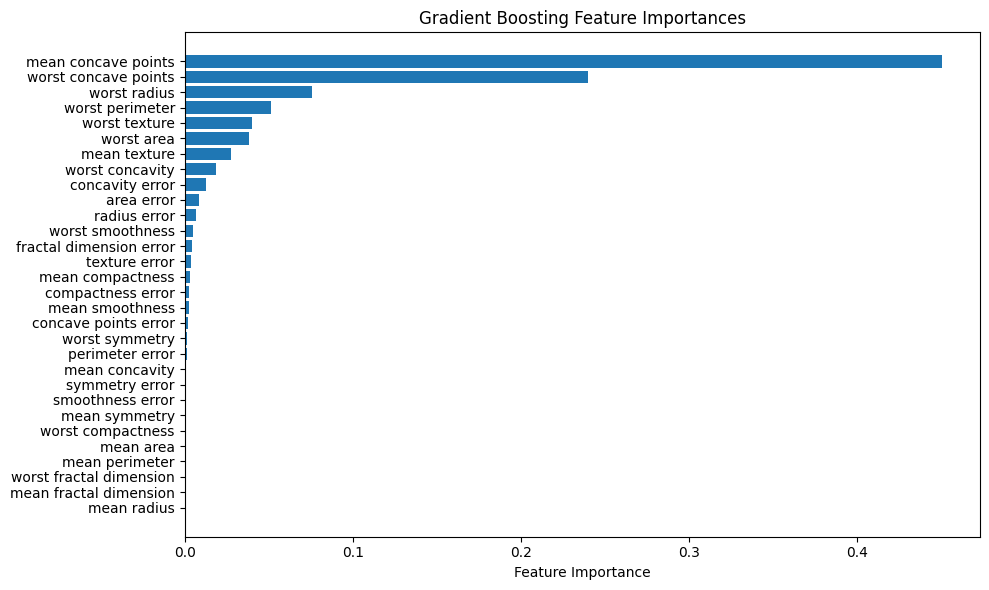

In [3]:
#Q.3
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Step 3: Train a Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                   max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Step 5: Print and plot feature importance
importances = model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

print("\nFeature Importances:")
for idx in sorted_idx:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_idx], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [4]:
#Q.4
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Create a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=10, 
                       noise=10, random_state=42)

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Step 3: Train Gradient Boosting Regressor
regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                      max_depth=3, random_state=42)
regressor.fit(X_train, y_train)

# Step 4: Predict and evaluate with R² score
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R-squared Score: {r2:.2f}")


R-squared Score: 0.93


In [5]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
#Q.5
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Train Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                   max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {acc:.2f}")


Gradient Boosting Accuracy: 0.96


In [9]:
pip install catboost


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
#Q.6
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Step 1: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Step 3: Initialize and train CatBoost Classifier
model = CatBoostClassifier(iterations=100, learning_rate=0.1,
                           depth=4, verbose=0, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate with F1-Score
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)

print(f"F1-Score: {f1:.2f}")


F1-Score: 0.97


In [12]:
#Q.7 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=10, 
                       noise=15, random_state=42)

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Step 3: Train Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                  max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate using MSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 1409.71


/Users/himanshujaiswal/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.97


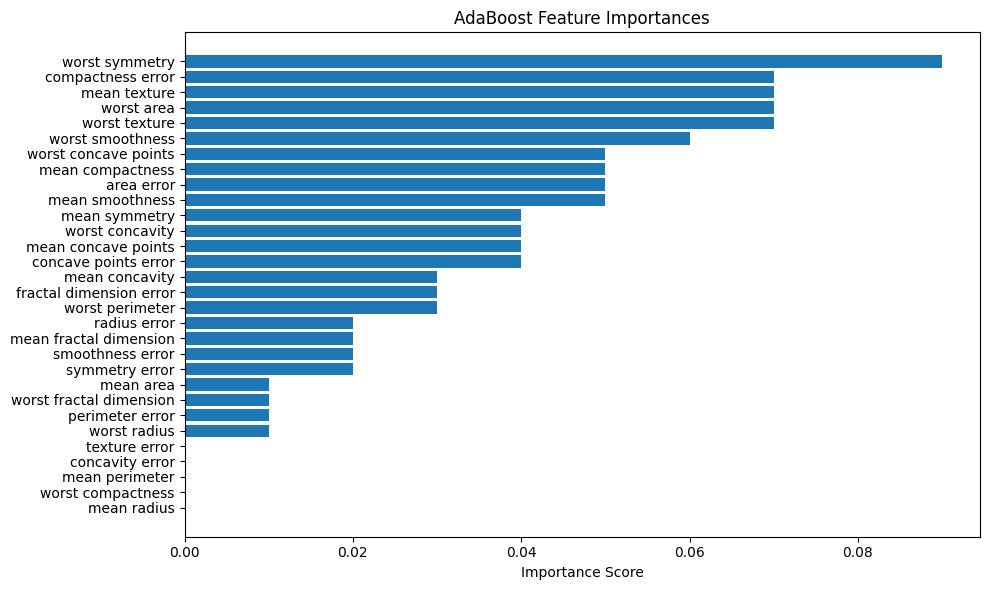

In [13]:
#q.8
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Step 3: Train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate accuracy
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Step 5: Visualize Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("AdaBoost Feature Importances")
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


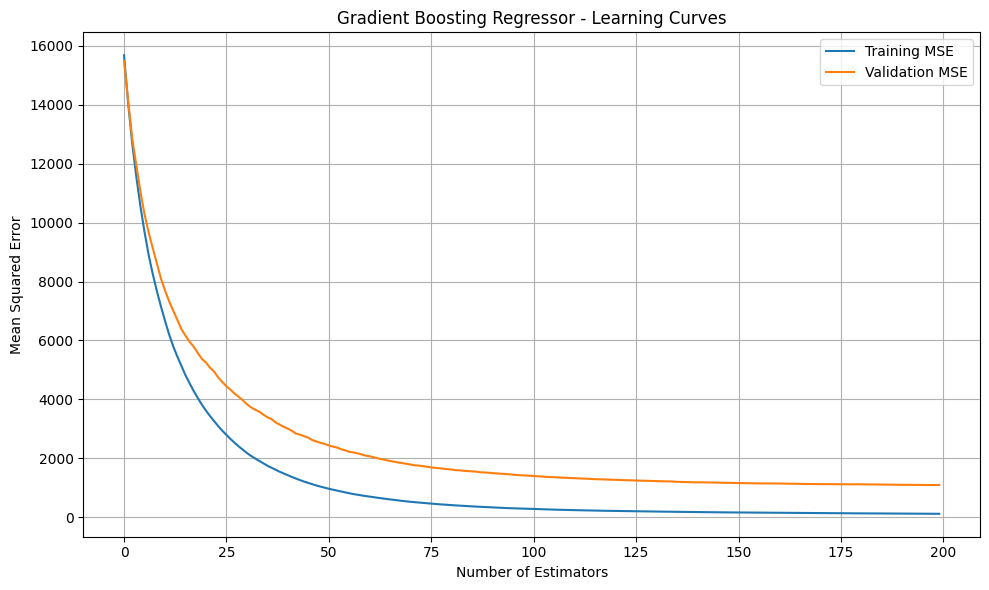

In [14]:
#Q. 9 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=15, random_state=42)

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Step 3: Train Gradient Boosting Regressor with staged predictions
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1,
                                  max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Step 4: Track MSE for each stage
train_errors = []
test_errors = []

for y_train_pred, y_test_pred in zip(model.staged_predict(X_train), model.staged_predict(X_test)):
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Step 5: Plot Learning Curves
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label="Training MSE")
plt.plot(test_errors, label="Validation MSE")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Boosting Regressor - Learning Curves")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
#Q.10 
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Step 3: Train XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', 
                      n_estimators=100, learning_rate=0.1, max_depth=3, 
                      random_state=42, verbosity=0)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Step 5: Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(model, importance_type='gain', max_num_features=10)
plt.title("Top 10 Feature Importances - XGBoost Classifier")
plt.tight_layout()
plt.show()


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/himanshujaiswal/Library/Python/3.9/lib/python/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <89AD948E-E564-3266-867D-7AF89D6488F0> /Users/himanshujaiswal/Library/Python/3.9/lib/python/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


<Figure size 600x600 with 0 Axes>

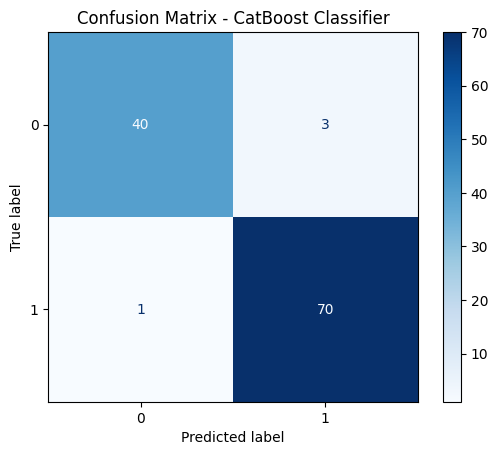

In [16]:
#Q.11
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Step 3: Train CatBoost Classifier
model = CatBoostClassifier(iterations=100, learning_rate=0.1,
                           depth=4, verbose=0, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict on test set
y_pred = model.predict(X_test)

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

# Step 6: Plot it
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - CatBoost Classifier")
plt.grid(False)
plt.show()


<Figure size 600x600 with 0 Axes>

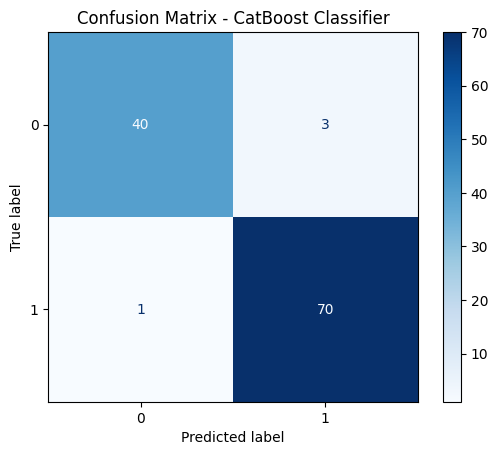

/Users/himanshujaiswal/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/himanshujaiswal/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/himanshujaiswal/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


n_estimators=10 => Accuracy: 0.9825
n_estimators=50 => Accuracy: 0.9737
n_estimators=100 => Accuracy: 0.9737


/Users/himanshujaiswal/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


n_estimators=150 => Accuracy: 0.9737


/Users/himanshujaiswal/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


n_estimators=200 => Accuracy: 0.9737


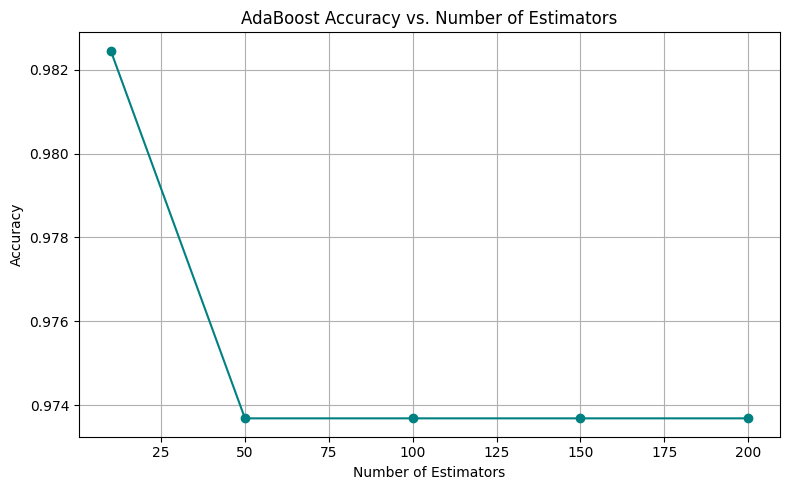

In [19]:
#Q.12
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Step 3: Train AdaBoost with varying number of estimators
estimators_list = [10, 50, 100, 150, 200]
accuracies = []

for n in estimators_list:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"n_estimators={n} => Accuracy: {acc:.4f}")

# Step 4: Plot accuracy vs number of estimators
plt.figure(figsize=(8, 5))
plt.plot(estimators_list, accuracies, marker='o', color='teal')
plt.title("AdaBoost Accuracy vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


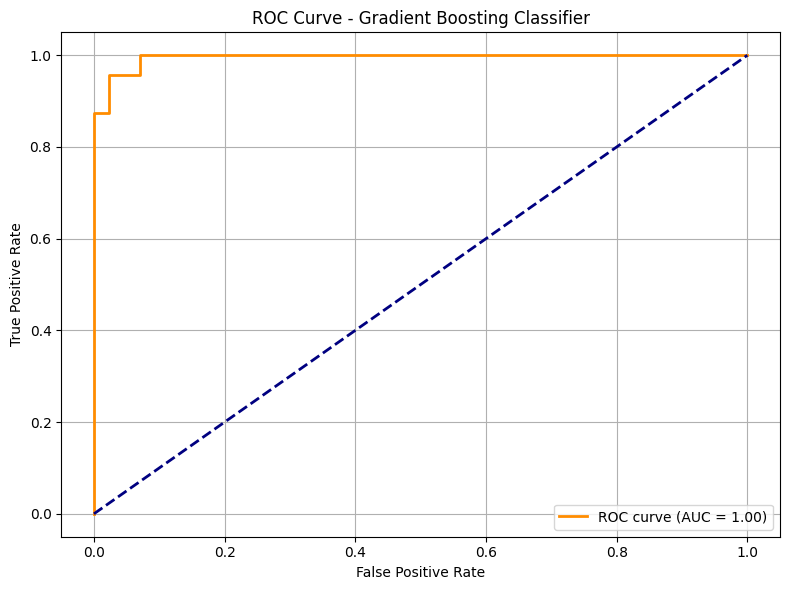

In [20]:
#Q.13
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Step 3: Train Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100,
                                   learning_rate=0.1,
                                   max_depth=3,
                                   random_state=42)
model.fit(X_train, y_train)

# Step 4: Get prediction probabilities for ROC
y_proba = model.predict_proba(X_test)[:, 1]

# Step 5: Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Step 6: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
#Q.14




('64bit', '')

🔹 Without Class Weights:

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1363
           1       0.77      0.67      0.72       137

    accuracy                           0.95      1500
   macro avg       0.87      0.83      0.85      1500
weighted avg       0.95      0.95      0.95      1500

🔸 With Class Weights:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1363
           1       0.67      0.78      0.72       137

    accuracy                           0.94      1500
   macro avg       0.82      0.87      0.84      1500
weighted avg       0.95      0.94      0.95      1500



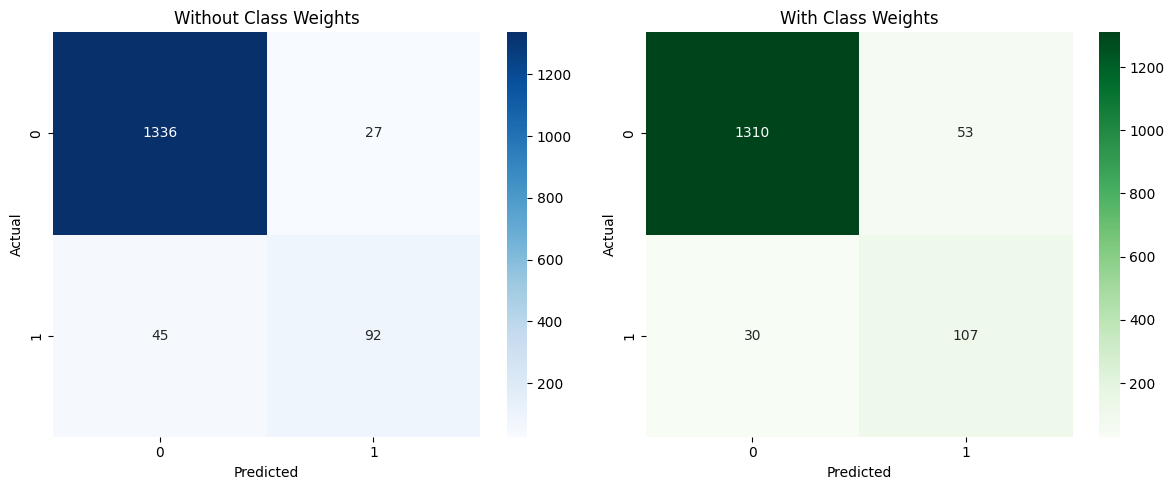

In [27]:
#Q.15
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Generate an imbalanced dataset
X, y = make_classification(n_samples=5000, n_features=20, 
                           n_classes=2, weights=[0.9, 0.1], 
                           flip_y=0.01, random_state=42)

# Step 2: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# Step 3a: Train CatBoost WITHOUT class weighting
model_no_weights = CatBoostClassifier(verbose=0, random_state=42)
model_no_weights.fit(X_train, y_train)
y_pred_no_weights = model_no_weights.predict(X_test)

# Step 3b: Train CatBoost WITH class weighting
# Class weights: inverse of class frequencies
class_weights = {0: 1, 1: 9}  # since class 1 is rarer
model_with_weights = CatBoostClassifier(class_weights=class_weights,
                                        verbose=0, random_state=42)
model_with_weights.fit(X_train, y_train)
y_pred_with_weights = model_with_weights.predict(X_test)

# Step 4: Evaluation
print("🔹 Without Class Weights:\n")
print(classification_report(y_test, y_pred_no_weights))

print("🔸 With Class Weights:\n")
print(classification_report(y_test, y_pred_with_weights))

# Step 5: Plot Confusion Matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_no_weights), annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Without Class Weights')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_with_weights), annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title('With Class Weights')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()
 


/Users/himanshujaiswal/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/himanshujaiswal/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning Rate = 0.01 => Accuracy: 0.9561
Learning Rate = 0.05 => Accuracy: 0.9561


/Users/himanshujaiswal/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/himanshujaiswal/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning Rate = 0.1 => Accuracy: 0.9649
Learning Rate = 0.5 => Accuracy: 0.9737


/Users/himanshujaiswal/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning Rate = 1.0 => Accuracy: 0.9737


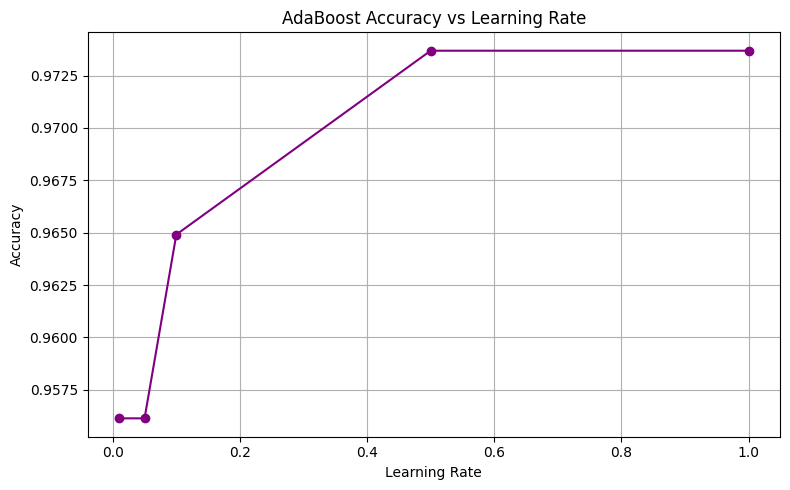

In [28]:
#Q.16
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Step 3: Try different learning rates
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0]
accuracies = []

for lr in learning_rates:
    model = AdaBoostClassifier(n_estimators=100, learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Learning Rate = {lr} => Accuracy: {acc:.4f}")

# Step 4: Plot accuracy vs learning rate
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, accuracies, marker='o', linestyle='-', color='purple')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("AdaBoost Accuracy vs Learning Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
#Q.17
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelBinarizer

# Step 1: Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Step 3: Train XGBoost Classifier (multi-class mode)
model = XGBClassifier(objective='multi:softprob',  # outputs probability
                      num_class=3,
                      eval_metric='mlogloss',
                      use_label_encoder=False,
                      random_state=42)

model.fit(X_train, y_train)

# Step 4: Predict class probabilities
y_pred_proba = model.predict_proba(X_test)

# Step 5: Compute multi-class log loss
loss = log_loss(y_test, y_pred_proba)
print(f"Multi-class Log Loss: {loss:.4f}")



XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/himanshujaiswal/Library/Python/3.9/lib/python/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <89AD948E-E564-3266-867D-7AF89D6488F0> /Users/himanshujaiswal/Library/Python/3.9/lib/python/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]
